In [1]:
import os

import seaborn as sns

import numpy as np
import pandas as pd

import civis
import civis.io

In [6]:
DB = 'Bernie DS'
state = 'TX'

modes = ['cell', 'land']


sql_cell = f"""select * 
               from bernie_cherdeman.final_cell_scores_percentiles 
               where state_code = '{state}'"""

sql_land = f"""select *
               from bernie_cherdeman.final_land_scores_percentiles 
               where state_code = '{state}'"""

df_cell = civis.io.read_civis_sql(sql_cell, database=DB, use_pandas=True)
df_land = civis.io.read_civis_sql(sql_land, database=DB, use_pandas=True)

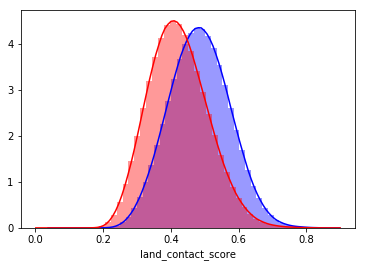

In [15]:
# Unadjusted Distributions
sns.distplot(df_cell['cell_contact_score'], norm_hist = True, color='blue')
sns.distplot(df_land['land_contact_score'], norm_hist = True, color = 'red')

In [13]:
df_land['adj_score'] = df_land['land_contact_score']*(df_cell['cell_contact_score'].mean()/df_land['land_contact_score'].mean())

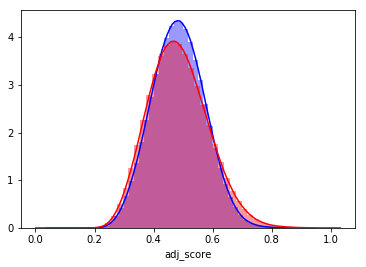

In [16]:
# Adjusted Distributions
sns.distplot(df_cell['cell_contact_score'], norm_hist = True, color='blue')
sns.distplot(df_land['adj_score'], norm_hist = True, color = 'red')